# Final Project Submission

Please fill out:
* Student name:  James Irving
* Student pace: ~~self paced / part time / full time~~: all-the-time
* Scheduled project review date/time: Now & Forever
* Instructor name: Life/Google

## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

- Parkinson's Disease is a neurological disorder that affects coordination, balance, walking, and can also affect speech.
    - [NIA - Parkinson's Disease]( https://www.nia.nih.gov/health/parkinsons-disease#:~:text=Parkinson's%20disease%20is%20a%20brain,have%20difficulty%20walking%20and%20talking)
    
    -[Parkinson's Foundation](https://www.parkinson.org/Understanding-Parkinsons/Symptoms/Non-Movement-Symptoms/Speech-and-Swallowing-Problems)
    
- This dataset was created during the publication for > "A comparative analysis of speech signal processing algorithms for Parkinson’s disease classification and the use of the tunable Q-factor wavelet transform" 
    - https://doi.org/10.1016/j.asoc.2018.10.022

# OBTAIN

- The dataset was downloaded from https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification. 
>- "Abstract: The data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9).
    - Data Source: 

- [Related paper](https://www.sciencedirect.com/science/article/abs/pii/S1568494618305799?via%3Dihub)
    - PDF located inside `reference` folder.
    - See Table 1 on page 9.
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Preprocessing tools
from sklearn.model_selection import train_test_split,cross_val_predict,cross_validate
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE,SMOTENC


## Models & Utils
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from time import time

In [2]:
# Explainers
import shap
print(shap.__version__)
shap.initjs()

0.37.0


In [3]:
# ## Changing Pandas Options to see full columns in previews and info
n=800
pd.set_option('display.max_columns',n)
pd.set_option("display.max_info_rows", n)
pd.set_option('display.max_info_columns',n)
pd.set_option('display.float_format',lambda x: f"{x:.2f}")

In [4]:
df = pd.read_csv('data/pd_speech_features.csv',skiprows=1)
df

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,GNE_SNR_SEO,GNE_NSR_TKEO,GNE_NSR_SEO,VFER_mean,VFER_std,VFER_entropy,VFER_SNR_TKEO,VFER_SNR_SEO,VFER_NSR_TKEO,VFER_NSR_SEO,IMF_SNR_SEO,IMF_SNR_TKEO,IMF_SNR_entropy,IMF_NSR_SEO,IMF_NSR_TKEO,IMF_NSR_entropy,mean_Log_energy,mean_MFCC_0th_coef,mean_MFCC_1st_coef,mean_MFCC_2nd_coef,mean_MFCC_3rd_coef,mean_MFCC_4th_coef,mean_MFCC_5th_coef,mean_MFCC_6th_coef,mean_MFCC_7th_coef,mean_MFCC_8th_coef,mean_MFCC_9th_coef,mean_MFCC_10th_coef,mean_MFCC_11th_coef,mean_MFCC_12th_coef,mean_delta_log_energy,mean_0th_delta,mean_1st_delta,mean_2nd_delta,mean_3rd_delta,mean_4th_delta,mean_5th_delta,mean_6th_delta,mean_7th_delta,mean_8th_delta,mean_9th_delta,mean_10th_delta,mean_11th_delta,mean_12th_delta,mean_delta_delta_log_energy,mean_delta_delta_0th,mean_1st_delta_delta,mean_2nd_delta_delta,mean_3rd_delta_delta,mean_4th_delta_delta,mean_5th_delta_delta,mean_6th_delta_delta,mean_7th_delta_delta,mean_8th_delta_delta,mean_9th_delta_delta,mean_10th_delta_delta,mean_11th_delta_delta,mean_12th_delta_delta,std_Log_energy,std_MFCC_0th_coef,std_MFCC_1st_coef,std_MFCC_2nd_coef,std_MFCC_3rd_coef,std_MFCC_4th_coef,std_MFCC_5th_coef,std_MFCC_6th_coef,std_MFCC_7th_coef,std_MFCC_8th_coef,std_MFCC_9th_coef,std_MFCC_10th_coef,std_MFCC_11th_coef,std_MFCC_12th_coef,std_delta_log_energy,std_0th_delta,std_1st_delta,std_2nd_delta,std_3rd_delta,std_4th_delta,std_5th_delta,std_6th_delta,std_7th_delta,std_8th_delta,std_9th_delta,std_10th_delta,std_11th_delta,std_12th_delta,std_delta_delta_log_energy,std_delta_delta_0th,std_1st_delta_delta,std_2nd_delta_delta,std_3rd_delta_delta,std_4th_delta_delta,std_5th_delta_delta,std_6th_delta_delta,std_7th_delta_delta,std_8th_delta_delta,std_9th_delta_delta,std_10th_delta_delta,std_11th_delta_delta,std_12th_delta_delta,Ea,Ed_1_coef,Ed_2_coef,Ed_3_coef,Ed_4_coef,Ed_5_coef,Ed_6_coef,Ed_7_coef,Ed_8_coef,Ed_9_coef,Ed_10_coef,det_entropy_shannon_1_coef,det_entropy_shannon_2_coef,det_entropy_shannon_3_coef,det_entropy_shannon_4_coef,det_entropy_shannon_5_coef,det_entropy_shannon_6_coef,det_entropy_shannon_7_coef,det_entropy_shannon_8_coef,det_entropy_shannon_9_coef,det_entropy_shannon_10_coef,det_entropy_log_1_coef,det_entropy_log_2_coef,det_entropy_log_3_coef,det_entropy_log_4_coef,det_entropy_log_5_coef,det_entropy_log_6_coef,det_entropy_log_7_coef,det_entropy_log_8_coef,det_entropy_log_9_coef,det_entropy_log_10_coef,det_TKEO_mean_1_coef,det_TKEO_mean_2_coef,det_TKEO_mean_3_coef,det_TKEO_mean_4_coef,det_TKEO_mean_5_coef,det_TKEO_mean_6_coef,det_TKEO_mean_7_coef,det_TKEO_mean_8_coef,det_TKEO_mean_9_coef,det_TKEO_mean_10_coef,det_TKEO_std_1_coef,det_TKEO_std_2_coef,det_TKEO_std_3_coef,det_TKEO_std_4_coef,det_TKEO_std_5_coef,det_TKEO_std_6_coef,det_TKEO_std_7_coef,det_TKEO_std_8_coef,det_TKEO_std_9_coef,det_TKEO_std_10_coef,app_entropy_shannon_1_coef,app_entropy_shannon_2_coef,app_entropy_shannon_3_coef,app_entropy_shannon_4_coef,app_entropy_shannon_5_coef,app_entropy_shannon_6_coef,app_entropy_shannon_7_coef,app_entropy_shannon_8_coef,app_entropy_shannon_9_coef,app_entropy_shannon_10_coef,app_entropy_log_1_coef,app_entropy_log_2_coef,app_entropy_log_3_coef,app_entropy_log_4_coef,app_entropy_log_5_coef,app_entropy_log_6_coef,app_entropy_log_7_coef,app_entropy_log_8_coef,app_entropy_log_9_coef,app_entropy_log_10_coef,app_det_TKEO_mean_1_coef,app_det_TKEO_mean_2_coef,app_det_TKEO_mean_3_coef,app_det_TKEO_mean_4_coef,app_det_TKEO_mean_5_coef,app_det_TKEO_mean_6_coef,app_det_TKEO_mean_7_coef,app_det_TKEO_mean_8_coef,app_det_TKEO_mean_9_coef,app_det_TKEO_mean_10_coef,app_TKEO_std_1_coef,app_TKEO_std_2_coef,app_TKEO_

# SCRUB

## Preprocessing our `titanic` data with  `Pipelines` &  `ColumnTransformer`

- [Pipeline Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)


- [ColumnTransformer Documentation](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

In [5]:
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn import metrics
from sklearn.model_selection import GridSearchCV


## New Imports
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer

In [6]:
# Import the data from 'titanic.csv' and store it in a pandas DataFrame 
raw_df = pd.read_csv('https://raw.githubusercontent.com/learn-co-curriculum/dsc-knn-with-scikit-learn-lab/master/titanic.csv')
raw_df.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'],
            inplace=True)

# Print the head of the DataFrame to ensure everything loaded correctly 
df = raw_df.copy()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.00,1,0,7.25,S
1,1,1,female,38.00,1,0,71.28,C
2,1,3,female,26.00,0,0,7.92,S
3,1,1,female,35.00,1,0,53.10,S
4,0,3,male,35.00,0,0,8.05,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.00,S
887,1,1,female,19.00,0,0,30.00,S
888,0,3,female,nan,1,2,23.45,S
889,1,1,male,26.00,0,0,30.00,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Survived  int64  
 1   Pclass    int64  
 2   Sex       object 
 3   Age       float64
 4   SibSp     int64  
 5   Parch     int64  
 6   Fare      float64
 7   Embarked  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
## Get X, y and train-test-split
target = 'Survived'

X = df.drop(columns=target).copy()
y = df[target].copy()

## train tst split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,
                                                    random_state=42)
[print(var.shape) for var in [X_train, X_test]];

(668, 7)
(223, 7)


## Preparing Preprocessing Pipelines 

In [9]:
## Get list of numeric features to scale
num_cols = list(X_train.select_dtypes('number').columns)

## Create a num_trasnformer pipeline 
## that will impute using median and then calculate z-scores
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])

num_cols

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [10]:
## Get list of cat features to encode
cat_cols= list(X_train.select_dtypes('object').columns)

## Create a cat_transformer pipeline 
## that will impute using median and then calculate z-scores
cat_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder',OneHotEncoder(sparse=False, handle_unknown='ignore'))
])
cat_cols

['Sex', 'Embarked']

In [11]:
preprocessor = ColumnTransformer([
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols)
])

In [12]:
from sklearn import set_config
set_config(display='diagram')
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Sex', 'Embarked'])])

In [13]:
## Fit preprocessing pipeline on training data and pull out the feature names and X_cols
preprocessor.fit(X_train)

cat_features = list(preprocessor.named_transformers_['cat'].named_steps['encoder']\
                            .get_feature_names(cat_cols))
X_cols = num_cols+cat_features


X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          index=X_train.index, columns=X_cols)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          index=X_test.index, columns=X_cols)


## Tranform X_train and X_test and make into DataFrames
X_train_df

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_MISSING,Embarked_Q,Embarked_S
298,-1.62,-0.09,-0.47,-0.47,-0.03,0.00,1.00,0.00,0.00,0.00,1.00
884,0.81,-0.32,-0.47,-0.47,-0.49,0.00,1.00,0.00,0.00,0.00,1.00
247,-0.41,-0.40,-0.47,2.05,-0.34,1.00,0.00,0.00,0.00,0.00,1.00
478,0.81,-0.55,-0.47,-0.47,-0.48,0.00,1.00,0.00,0.00,0.00,1.00
305,-1.62,-2.17,0.38,2.05,2.31,0.00,1.00,0.00,0.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...
106,0.81,-0.63,-0.47,-0.47,-0.48,1.00,0.00,0.00,0.00,0.00,1.00
270,-1.62,-0.09,-0.47,-0.47,-0.02,0.00,1.00,0.00,0.00,0.00,1.00
860,0.81,0.91,1.22,-0.47,-0.35,0.00,1.00,0.00,0.00,0.00,1.00
435,-1.62,-1.16,0.38,2.05,1.70,1.00,0.00,0.00,0.00,0.00,1.00


## Resampling with SMOTENC

In [14]:
y_train.value_counts(1)

0   0.62
1   0.38
Name: Survived, dtype: float64

In [15]:
## Save list of trues and falses for each cols
smote_feats = [False]*len(num_cols) +[True]*len(cat_features)
# smote_feats

In [16]:
## resample training data
smote = SMOTENC(smote_feats)
X_train_sm,y_train_sm = smote.fit_resample(X_train_df,y_train)
y_train_sm.value_counts()

1    415
0    415
Name: Survived, dtype: int64

### Setting `train_test_list`

In [17]:
### SAVING XY DATA TO LIST TO UNPACK
train_test_list = [X_train_sm,X_test_df,y_train_sm,y_test]

### Modeling Functionx (WIP)

In [18]:
# !pip install -U tzlocal
import datetime as dt
import time
import tzlocal as tz
from sklearn import metrics

def get_time(verbose=False):
    """Helper function to return current time.
    Uses tzlocal to display time in local tz, if available."""
    try: 
        now =  dt.datetime.now(tz.get_localzone())
        tic = time.time()
    except:
        now = dt.datetime.now()
        tic = time.time()
        print("[!] Returning time without tzlocal.")       
    return now,tic
        
    
def get_report(model,X_test,y_test,as_df=False,label="TEST DATA"):
    """Get classification report from sklearn and converts to DataFrame"""
    ## Get Preds and report
    y_hat_test = model.predict(X_test)
    scores = metrics.classification_report(y_test, y_hat_test,
                                          output_dict=as_df) 
    ## convert to df if as_df
    if as_df:
        report = pd.DataFrame(scores).T.round(2)
        report.iloc[2,[0,1,3]] = ''
        return report
    else:
        header="\tCLASSIFICATION REPORT"
        if len(label)>0:
            header += f" - {label}"
        dashes='---'*20
        print(f"{dashes}\n{header}\n{dashes}")
        print(scores)
        
        
        

    
def fit_and_time_model(model, X_train,X_test,y_train,y_test,
                      fit_kws={}, scoring="accuracy",normalize='true',
                       fmt="%m/%d/%y-%T", verbose=True):
    """Fits the provided model and evaluates using provided data."""
    ## Time
    start,tic = get_time()
    if verbose: 
        print(f"[i] Training started at {start.strftime(fmt)}:")
        
    model.fit(X_train, y_train,**fit_kws)
    
    ## Calc stop time and elapse
    stop,toc = get_time()
    elapsed = toc-tic


            
            
    ## Get model scores
    scorer = metrics.get_scorer(scoring)
    scores_dict ={f'Train':scorer(model,X_train,y_train),  
                  f'Test':scorer(model, X_test,y_test)}
    scores_dict['Difference'] = scores_dict['Train'] - scores_dict['Test']
    scores_df = pd.DataFrame(scores_dict,index=[scoring])
    
    ## Time and report back
    if verbose:
#         print(f"[i] Training completed at {stop.strftime(fmt)}")
        if elapsed >120:
            print(f"\tTraining time was {elapsed/60:.4f} minutes.")
        else:
            print(f"\tTraining time was {elapsed:.4f} seconds.")
    print("\n",scores_df.round(2),"\n")
    
    ## Plot Confusion Matrix and display classification report
    get_report(model,X_test,y_test,as_df=False)
    
    fig,ax = plt.subplots(figsize=(10,5),ncols=2)
    metrics.plot_confusion_matrix(model,X_test,y_test,normalize=normalize,
                                  cmap='Blues',ax=ax[0])
    metrics.plot_roc_curve(model,X_test,y_test,ax=ax[1])
    ax[1].plot([0,1],[0,1],ls=':')
    ax[1].grid()
    fig.tight_layout()
    plt.show()
    return model




def evaluate_grid(grid,X_test,y_test,X_train=None,y_train=None):
    print('The best parameters were:')
    print("\t",grid.best_params_)
    
    model = grid.best_estimator_    

    print('\n[i] Classification Report')
    evaluate_classification(model, X_test,y_test,X_train=X_train,y_train=y_train)
    
    
    
def get_importance(tree, X_train_df, top_n=20,figsize=(10,10)):
    
    df_importance = pd.Series(tree.feature_importances_,
                              index=X_train_df.columns)
    df_importance.sort_values(ascending=True).tail(top_n).plot(
        kind='barh',figsize=figsize,title='Feature Importances',
    ylabel='Feature',)
    return df_importance



def show_tree(clf,figsize=(60,25),class_names=['Died','Survived'],
              savefig=False,fname='titanic_tree.pdf',max_depth=None,):
    
    fig,ax = plt.subplots(figsize=figsize)
    plot_tree(clf,filled=True,rounded=True,proportion=True,
              feature_names=X_train_df.columns,
              class_names=class_names,ax=ax);
    fig.tight_layout()
    
    if savefig:
        fig.savefig(fname, dpi=300,orientation='landscape')
    return fig


## Linear SVC

[i] Training started at 05/15/21-16:35:59:
	Training time was 0.0194 seconds.

           Train  Test  Difference
accuracy   0.77  0.78       -0.01 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.74      0.71      0.72        89

    accuracy                           0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



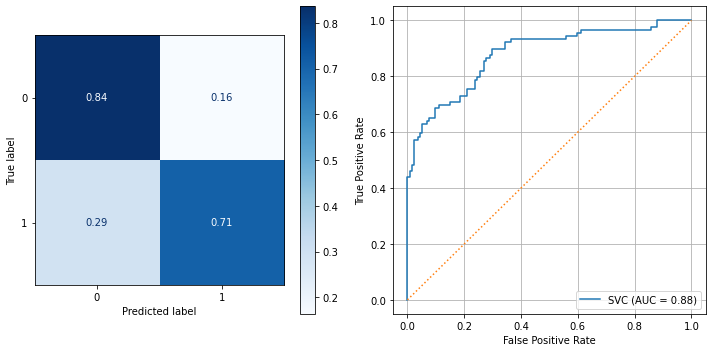

SVC(C=1, kernel='linear')

In [19]:
# tic = time() #timing!
svc_linear = SVC(kernel='linear',C=1)
fit_and_time_model(svc_linear,*train_test_list)

### RandomForest

[i] Training started at 05/15/21-16:35:59:
	Training time was 0.1725 seconds.

           Train  Test  Difference
accuracy   0.98  0.78        0.21 

------------------------------------------------------------
	CLASSIFICATION REPORT - TEST DATA
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       134
           1       0.70      0.76      0.73        89

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



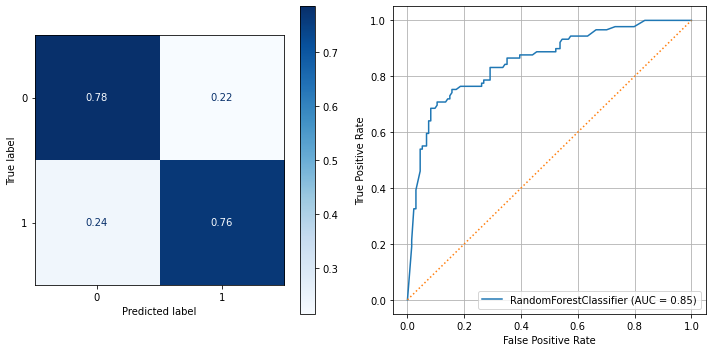

RandomForestClassifier()

In [20]:
rf = RandomForestClassifier()
fit_and_time_model(rf,*train_test_list)

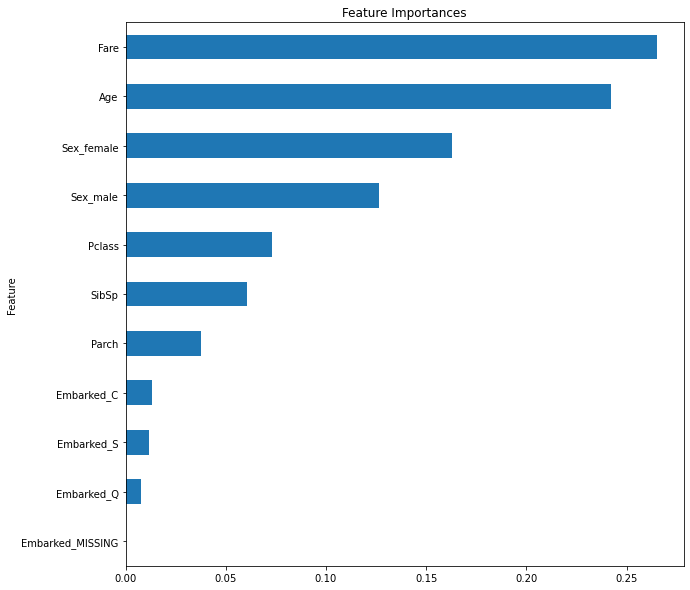

In [21]:
get_importance(rf,X_test_df);

## Using SHAP and Shapely Values for Model Interpretation




- White Paper on Shapely Values:
    - https://arxiv.org/abs/1705.07874
    
- Towards Data Science Blog Posts:
    - [Explain Your Model with SHAP Values](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d)

    - [Explain Any Model with SHAP KernelExplaibner](https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)





- Videos/Talks:
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
    

### Using SHAP

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        


- See [this blog post](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) for intro to topic and how to use with trees

- For non-tree/random forest models [see this follow up post]( https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

        

### To Get Expanations for Trees:



- Import and initialize javascript:

```python
import shap 
shap.initjs()
```
1. Create a shap explainer using your fit model.

```python
explainer = shap.TreeExplainer(xgb_clf)
```

2. Get shapely values from explainer for your training data

```python
shap_values = explainer.shap_values(X_train,y_train)
```            

3. Select which type of the available plots you'd like to visualize

    
- **Types of Plots:**
    - `summary_plot()`
    - `dependence_plot()`
    - `force_plot()` for a given observation
    - `force_plot()` for all data
    
  

In [22]:
import shap 
print(shap.__version__)
shap.initjs()

0.37.0


In [23]:
## Initialize an explainer with the model
explainer = shap.TreeExplainer(rf)

## Calculaate shap values for test data
shap_values = explainer.shap_values(X_test_df,y_test)
len(shap_values)

2

In [24]:
shap_values[0]

array([[ 4.73032677e-02,  8.26390747e-02,  2.43074096e-02, ...,
         1.88958682e-05, -3.49365590e-03, -3.61934288e-02],
       [ 2.77359616e-02, -1.02237534e-02, -4.23010904e-03, ...,
         8.04940842e-06, -4.10464326e-03,  1.10811946e-02],
       [ 6.01977775e-02,  1.17828602e-01,  1.63645134e-02, ...,
         1.22521786e-05, -2.14085163e-03,  1.09235883e-02],
       ...,
       [ 5.42615601e-02,  7.10617949e-02, -1.13390364e-03, ...,
         1.25125228e-05,  4.08867443e-03,  1.83650390e-02],
       [-7.76345313e-02,  1.91982828e-02, -2.50364280e-02, ...,
         1.33322662e-05,  8.87121263e-04,  6.91020606e-03],
       [ 6.34837150e-02,  8.51781698e-02,  2.45488786e-03, ...,
         1.22103923e-05,  8.81341145e-05,  1.56425624e-02]])

### Summary Plot

```python
## For normal bar graph of importance:
shap.summary_plot(shap_values[1],X_train,plot_type='bar')

## For detail Shapely value visuals:
shap.summary_plot(shap_values, X_train)
```
  

**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


>- **IMPORTANT NOTE:** You may need to slice out the correct shap_values for the target class. (by default explainer.shap_values seems to return a list for a binary classification, one set of shap values for each class).
    - This will cause issues like the summary plot having a bar with an equal amount of blue and red for each class. 
    - To fix, slice out the correct matrix from shap_values [0,1]


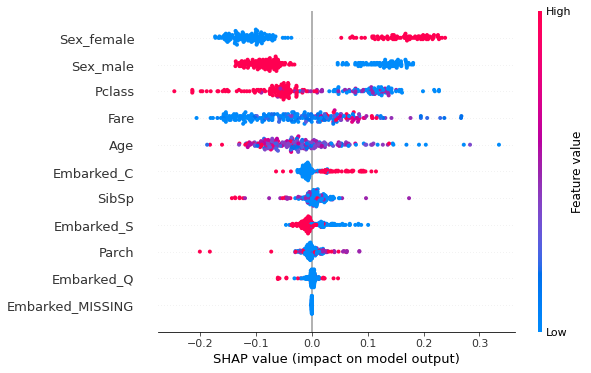

In [25]:
shap.summary_plot(shap_values[1],X_test_df)

**`shap.dependence_plot`**


```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

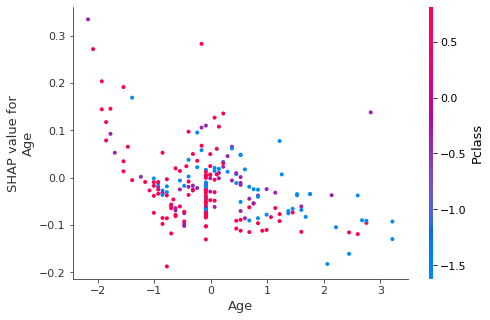

In [26]:
shap.dependence_plot('Age',shap_values[1],X_test_df)

### Force Plots

`shap.force_plot`

To show an individual data point's prediction and the factors pushing it towards one class or another

```python
## Just using np to randomly select a row
row = np.random.choice(range(len(X_train)))
                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_train.iloc[row,:])
```

#### Explain Individual Plot

In [27]:
row = np.random.choice(range(len(X_test_df)))
row

220

In [29]:
print(X_test_df.iloc[row])
y_test.iloc[row]

Pclass              0.81
Age                -0.09
SibSp              -0.47
Parch              -0.47
Fare               -0.47
Sex_female          0.00
Sex_male            1.00
Embarked_C          0.00
Embarked_MISSING    0.00
Embarked_Q          0.00
Embarked_S          1.00
Name: 101, dtype: float64


0

In [30]:
## Individual forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1][row],X_test_df.iloc[row])       

In [31]:
## Overall Forceplot
shap.force_plot(explainer.expected_value[1], shap_values[1],X_test_df)       

## BOOKMARK

In [ ]:
stop

### Using SHAP with SVMS: 

https://slundberg.github.io/shap/notebooks/Iris%20classification%20with%20scikit-learn.html**
- Must run the SVC with `probability=True` to be able to use `.predict_proba`, which is needed for the `KernelExplainer`

In [ ]:
svc_linear = fit_and_time_model(SVC(kernel='linear',probability=True,C=1),
                                *train_test_list)

In [ ]:
# pred_func = svc_linear.decision_function
# X_shap = shap.sample(X_test_df,nsamples=100)
explainer = shap.KernelExplainer(svc_linear.predict_proba,X_test_df)
explainer

In [ ]:
shap_values = explainer.shap_values(X_test_df,nsamples=100)#, nsamples=1000)

In [ ]:
len(shap_values)

In [ ]:
# # shap.force_plot(shap_values[0],X_test)
shap.summary_plot(explainer.expected_value, shap_values) 

In [ ]:
# shap.summary_plot(shap_values,X_test,plot_type='bar')

### First: Linear Kernel

# iNTERPRET

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.